데이터 셋 불러오기

In [ ]:
import pandas as pd
df_student_per_teacher=pd.read_excel('C:/portfolio/code/week4/day1/교원1인당학생수.xlsx', skiprows=1)
df_private=pd.read_excel('C:/portfolio/code/week4/day1/인구천명당사설학원수.xlsx', skiprows=1)
df_student = pd.read_excel('C:/portfolio/code/week4/day1/학급당학생수.xlsx', skiprows=1)
df_a=pd.read_excel('C:/portfolio/code/week4/day1/학생의학교생활만족도.xlsx', skiprows=1)

문자열을 숫자열로 바꾸기

In [10]:
score_cols = ['매우만족', '약간만족', '보통', '약간불만족', '매우불만족']
df_a[score_cols] = df_a[score_cols].apply(pd.to_numeric, errors='coerce')

## df_a 전처리

In [11]:
df_a

,행정구역별(1),특성별(1),특성별(2),계(재학생),매우만족,약간만족,보통,약간불만족,매우불만족
0,전국,전체,계,100,22.2,35.1,36.9,5.2,0.7
1,NaN,성별,남자,100,23.5,36.1,35.9,3.6,0.8
2,NaN,NaN,여자,100,20.8,34.0,37.9,6.8,0.6
3,서울,전체,계,100,24.0,39.0,32.3,4.6,NaN
4,부산,전체,계,100,21.4,41.0,35.9,1.7,NaN
5,대구,전체,계,100,13.4,53.8,27.8,4.0,1.0
6,인천,전체,계,100,16.4,27.9,50.2,4.1,1.4
7,광주,전체,계,100,15.6,43.3,41.1,NaN,NaN
8,대전,전체,계,100,18.7,33.6,43.4,3.0,1.4
9,울산,전체,계,100,32.8,25.3,35.5,6.3,NaN


평균치로 결측값 매우기

In [12]:
df_a['약간불만족']=df_a['약간불만족'].fillna(df_a['약간불만족'].mean())
df_a['매우불만족']=df_a['매우불만족'].fillna(df_a['매우불만족'].mean())

필요 없는 열 삭제

In [13]:
df_a.drop('계(재학생)', axis=1, inplace=True)
df_a.drop(['특성별(1)','특성별(2)'], axis=1, inplace=True)

NaN 행 삭제

In [14]:
df_a.dropna(axis=0, inplace=True)

불만족 지수 입력

In [15]:
df_a['불만족지수']=(
    df_a['매우만족'] * 1 +
    df_a['약간만족'] * 2 +
    df_a['보통'] * 3 +
    df_a['약간불만족'] * 4+
    df_a['매우불만족'] *5
)
df_a

,행정구역별(1),매우만족,약간만족,보통,약간불만족,매우불만족,불만족지수
0,전국,22.2,35.1,36.9,5.200000,0.700000,227.400000
3,서울,24.0,39.0,32.3,4.600000,1.563636,225.118182
4,부산,21.4,41.0,35.9,1.700000,1.563636,225.718182
5,대구,13.4,53.8,27.8,4.000000,1.000000,225.400000
6,인천,16.4,27.9,50.2,4.100000,1.400000,246.200000
7,광주,15.6,43.3,41.1,4.778947,1.563636,252.433971
8,대전,18.7,33.6,43.4,3.000000,1.400000,235.100000
9,울산,32.8,25.3,35.5,6.300000,1.563636,222.918182
10,세종,28.7,30.8,33.4,6.500000,0.600000,219.500000
11,경기,23.8,32.4,35.1,7.900000,0.700000,229.000000


나머지 dataframe과 index 유형과 이름 통일 및 필요한 변수만 남기기

In [ ]:
df_a.rename(columns={'행정구역별(1)':'행정구역별'}, inplace=True)
df_a.drop(['매우만족','약간만족','보통','약간불만족','매우불만족'], axis=1, inplace=True)
df_a=df_a.set_index('행정구역별')

In [21]:
df_a

,불만족지수
행정구역별,
전국,227.400000
서울,225.118182
부산,225.718182
대구,225.400000
인천,246.200000
광주,252.433971
대전,235.100000
울산,222.918182
세종,219.500000


## 나머지 DataFrame전처리

나머지 DataFrame의 행정구역 이름 변환

In [17]:
region_rename = {
    '서울특별시': '서울',
    '부산광역시': '부산',
    '대구광역시': '대구',
    '인천광역시': '인천',
    '광주광역시': '광주',
    '대전광역시': '대전',
    '울산광역시': '울산',
    '세종특별자치시': '세종',
    '경기도': '경기',
    '강원특별자치도': '강원',
    '충청북도': '충북',
    '충청남도': '충남',
    '전북특별자치도': '전북',
    '전라남도': '전남',
    '경상북도': '경북',
    '경상남도': '경남',
    '제주특별자치도': '제주'
}
df_student_per_teacher['행정구역별']=df_student_per_teacher['행정구역별'].map(region_rename).fillna(df_student_per_teacher['행정구역별'])
df_private['행정구역별']=df_private['행정구역별'].map(region_rename).fillna(df_private['행정구역별'])
df_student['행정구역별']=df_student['행정구역별'].map(region_rename).fillna(df_student['행정구역별'])

데이터 분석에 필요한 변수를 간소화, 필요 없는 열 삭제, 인덱스 통일

In [18]:
df_student_per_teacher.columns = df_student_per_teacher.columns.str.strip().str.replace(" ", "_")
df_student_per_teacher.drop(['재적학생수(A)', '교원수(B)'], axis=1, inplace=True)
df_student_per_teacher.rename(columns={'교원1인당_학생수(A/B)' : '교원1인당학생수'},inplace=True)
df_student_per_teacher=df_student_per_teacher.set_index('행정구역별')

df_private.columns = df_private.columns.str.strip().str.replace(" ", "_")
df_private.drop(['사설학원수(A)_(개)', '주민등록인구(B)_(명)'], axis=1, inplace=True)
df_private.rename(columns={'인구천명당사설학원수(A/B*1,000)(개)' : '인구천명당사설학원수'},inplace=True)
df_private=df_private.set_index('행정구역별')


df_student.drop(['유치원','초등학교','중학교','고등학교'], axis=1, inplace=True)
df_student.rename(columns={'전체' : '학급당학생수'},inplace=True)
df_student=df_student.set_index('행정구역별')

## 새로운 DataFrame 생성

In [22]:
df_merged=pd.concat([df_a, df_private, df_student, df_student_per_teacher], axis=1)
df_merged

,불만족지수,인구천명당사설학원수,학급당학생수,교원1인당학생수
행정구역별,,,,
전국,227.400000,1.8,21.11,13.92
서울,225.118182,1.6,21.77,14.98
부산,225.718182,1.7,21.33,15.32
대구,225.400000,1.9,22.21,13.86
인천,246.200000,1.5,22.18,14.26
광주,252.433971,2.5,21.04,14.63
대전,235.100000,1.6,20.24,14.60
울산,222.918182,2.4,21.84,13.02
세종,219.500000,2.9,20.50,13.19


열 간 상관관계 시각화

c:\Users\kgh44\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\kgh44\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


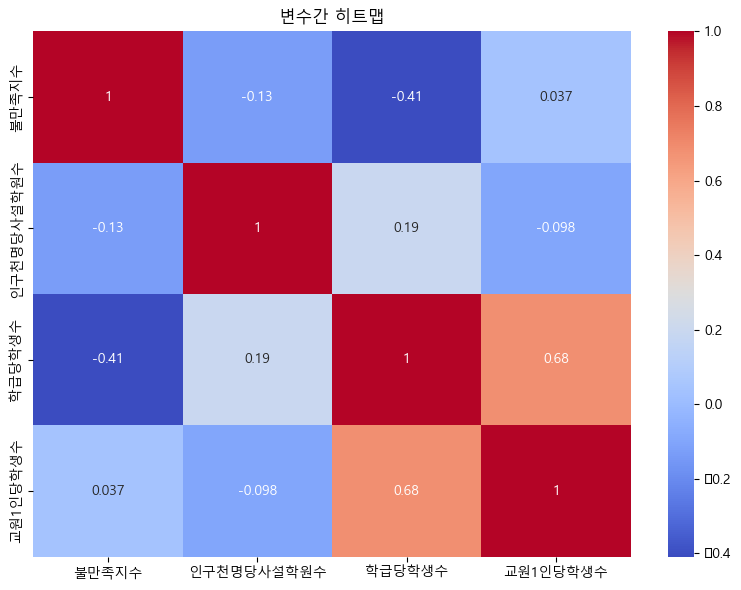

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def heatmap1(df_merged):
    plt.figure(figsize=(8,6))
    matplotlib.rc('font', family='Malgun Gothic')
    corr=df_merged.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('변수간 히트맵')
    plt.tight_layout()
    plt.show()
heatmap1(df_merged)

모델 제작

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

x = df_merged[['교원1인당학생수', '인구천명당사설학원수', '학급당학생수']]
y = df_merged['불만족지수']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)

모델 성능 평가

In [26]:
def linear(df_merged):
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    r2=r2_score(y_test,y_pred)
    print('RMSE :', rmse)
    print('R2 :', r2)
linear(df_merged)

RMSE : 11.522757386060809
R2 : 0.16908503619551996


변수별 가중치 출력

In [27]:
for col, coef in zip(x.columns, model.coef_):
    print(f"{col}: {coef:.3f}")

교원1인당학생수: 5.831
인구천명당사설학원수: 5.512
학급당학생수: -6.254


예측값 vs 실제값 차이 시각화

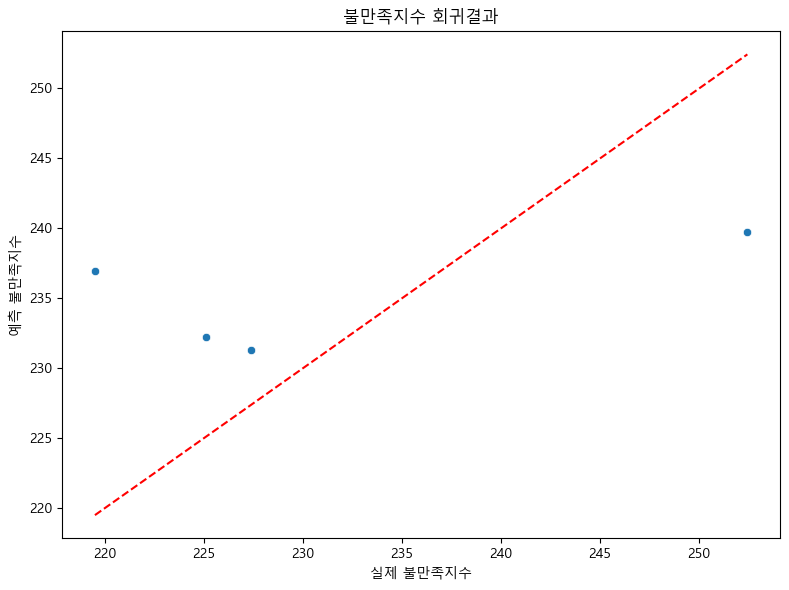

<Figure size 640x480 with 0 Axes>

In [28]:
def linear_visual(df_merged):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='이상적 회귀선')
    plt.xlabel('실제 불만족지수')
    plt.ylabel('예측 불만족지수')
    plt.title('불만족지수 회귀결과')
    plt.tight_layout()
    plt.show()
    plt.savefig('불만족지수회귀결과.png')
linear_visual(df_merged)

OLS 모델 성능 측정

In [29]:
import statsmodels.api as sm

x = df_merged[['교원1인당학생수', '인구천명당사설학원수', '학급당학생수']]
y = df_merged['불만족지수']
a = sm.add_constant(x)

model = sm.OLS(y, a).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  불만족지수   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     2.637
Date:                Sun, 27 Jul 2025   Prob (F-statistic):             0.0905
Time:                        18:23:07   Log-Likelihood:                -65.865
No. Observations:                  18   AIC:                             139.7
Df Residuals:                      14   BIC:                             143.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        274.0880     35.424      7.737      0.0